# Linear Regressors
Comencem provant alguns models lineals. Fem també un anàlisi de la importància de cada característica.

In [1]:
# Importem la llibreries i funcions per evaluar els models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm, trange

from utils import evaluate_models
from utils import feature_importance_abs
from utils import plot_model_evaluation
from utils import plot_linear_model_feature_importance
from sklearn.metrics import confusion_matrix

### Load processed data

In [2]:
pth = 'data/full_data/'

df_20 = pd.read_csv(pth + "full_data_2020.csv", index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_21 = pd.read_csv(pth + "full_data_2021.csv", index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_22 = pd.read_csv(pth + "full_data_2022.csv", index_col=False, skipinitialspace=True, skip_blank_lines=True)
df_23 = pd.read_csv(pth + "full_data_2023.csv", index_col=False, skipinitialspace=True, skip_blank_lines=True)
df = pd.concat([df_20, df_21, df_22, df_23], ignore_index = True)

if 'Unnamed: 0' in df.columns:
    df = df.drop(['Unnamed: 0'], axis=1)   # Eliminar columna Unnamed

# Visualitzar el df
df.head()

,station_id,year,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1,percentage_docks_available,...,altitude,post_code,capacity,mm_precip,temperature,rating,ocio,carriles,time,festius
0,1.0,2020,1.0,1.0,2.0,0.522727,0.503788,0.469697,0.403409,0.354167,...,16.0,8013,45,0.0,5.75,6.0,88.0,6.0,2,1
1,1.0,2020,1.0,1.0,7.0,0.289773,0.373106,0.304924,0.238636,0.240530,...,16.0,8013,45,0.0,4.25,6.0,88.0,6.0,7,1
2,1.0,2020,1.0,1.0,12.0,0.253788,0.268939,0.350379,0.344697,0.393939,...,16.0,8013,45,0.0,12.45,6.0,88.0,6.0,12,1
3,1.0,2020,1.0,1.0,17.0,0.390152,0.346591,0.255814,0.220930,0.186047,...,16.0,8013,45,0.0,9.35,6.0,88.0,6.0,17,1
4,1.0,2020,1.0,1.0,22.0,0.083333,0.218992,0.437984,0.515504,0.470930,...,16.0,8013,45,0.0,6.80,6.0,88.0,6.0,22,1


In [3]:
# Separar les característiques (X) de la variable objectiu (y)
X = df.drop(['percentage_docks_available'], axis=1)
y = df['percentage_docks_available']

In [4]:
# Dividim les dades en conjunts de training i testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Simple

In [5]:
# Creem model de regressió lineal
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

# Entrenem el model
model_linear.fit(X_train, y_train)

# Fem les prediccions
y_pred_linear = model_linear.predict(X_test)

In [6]:
# Evaluem el model
results = evaluate_models(y_test, y_pred_linear)
print(results)

{'Mean Squared Error': 0.013208198999653755, 'Mean Absolute Error': 0.07459060623224867, 'R2 Score': 0.8378599232556165}


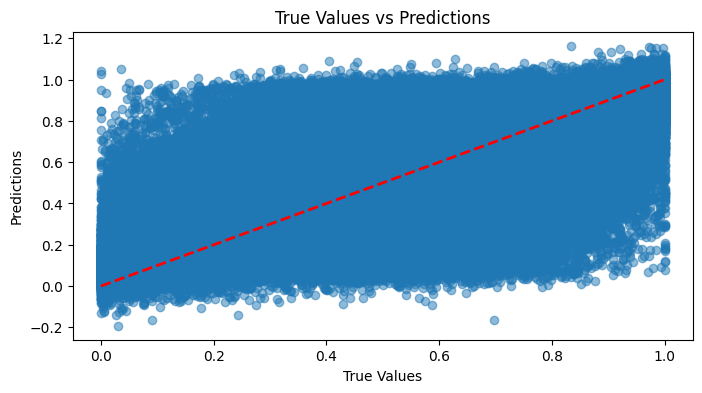

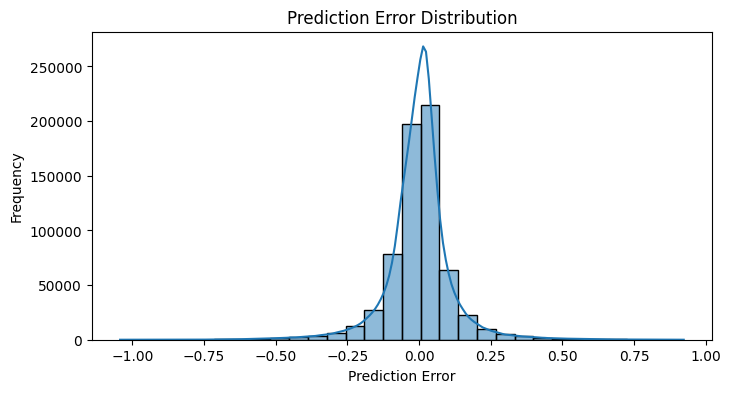

In [7]:
# Evaluem el model
plot_model_evaluation(y_test, y_pred_linear)

In [8]:
# Feature importance
feature_importance_abs(model_linear.coef_, X.columns.tolist())

,Feature,Importance
8,ctx-1,1.100597
9,lat,0.319115
6,ctx-3,0.074074
14,mm_precip,0.000650
15,temperature,0.000572
13,capacity,0.000192
11,altitude,0.000169
18,carriles,0.000064
19,time,0.000045
0,station_id,-0.000007


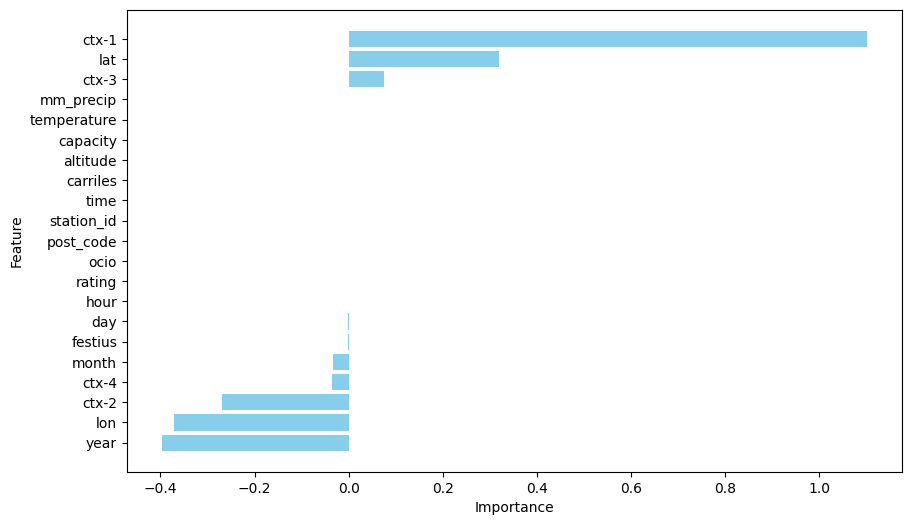

In [9]:
# Evaluem la importància de les característiques
plot_linear_model_feature_importance(model_linear.coef_, X.columns.to_list())

Feature: 0, Score: -0.00001
Feature: 1, Score: -0.39666
Feature: 2, Score: -0.03278
Feature: 3, Score: -0.00111
Feature: 4, Score: -0.00019
Feature: 5, Score: -0.03497
Feature: 6, Score: 0.07407
Feature: 7, Score: -0.26922
Feature: 8, Score: 1.10060
Feature: 9, Score: 0.31912
Feature: 10, Score: -0.37083
Feature: 11, Score: 0.00017
Feature: 12, Score: -0.00001
Feature: 13, Score: 0.00019
Feature: 14, Score: 0.00065
Feature: 15, Score: 0.00057
Feature: 16, Score: -0.00011
Feature: 17, Score: -0.00004
Feature: 18, Score: 0.00006
Feature: 19, Score: 0.00005
Feature: 20, Score: -0.00132


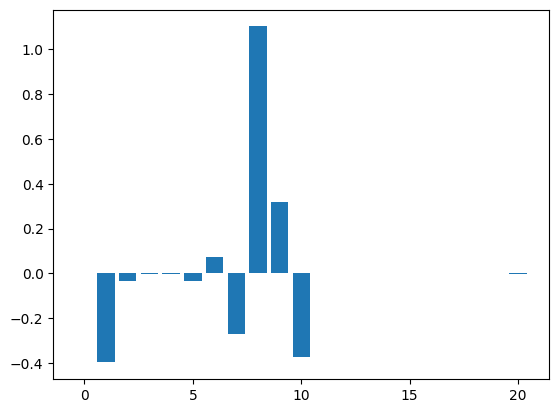

In [12]:
importance = model_linear.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Random forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Crear el model de regressió RandomForest
model_random = RandomForestRegressor(n_estimators=7, random_state=42)

# Entrenem el model
model_random.fit(X_train, y_train)

# Fem les prediccions
y_pred_random = model_random.predict(X_test)

In [14]:
# Evaluem el model
results = evaluate_models(y_test, y_pred_random)
print(results)

{'Mean Squared Error': 0.013251081279647612, 'Mean Absolute Error': 0.07589811674522509, 'R2 Score': 0.8373335126398043}


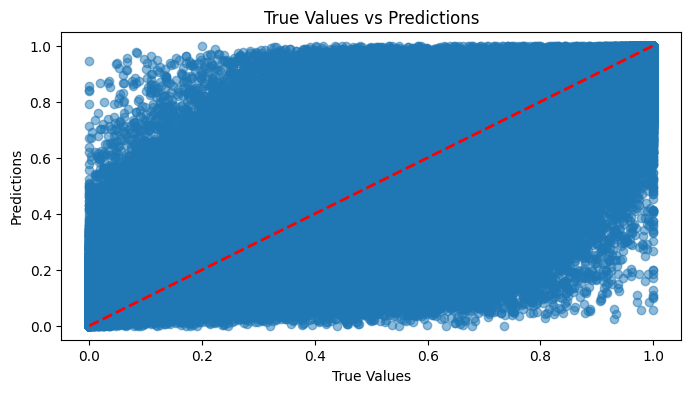

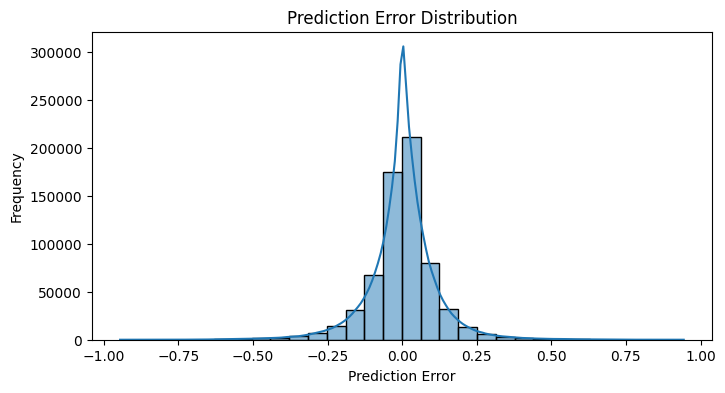

In [15]:
# Evaluem el model
plot_model_evaluation(y_test, y_pred_random)

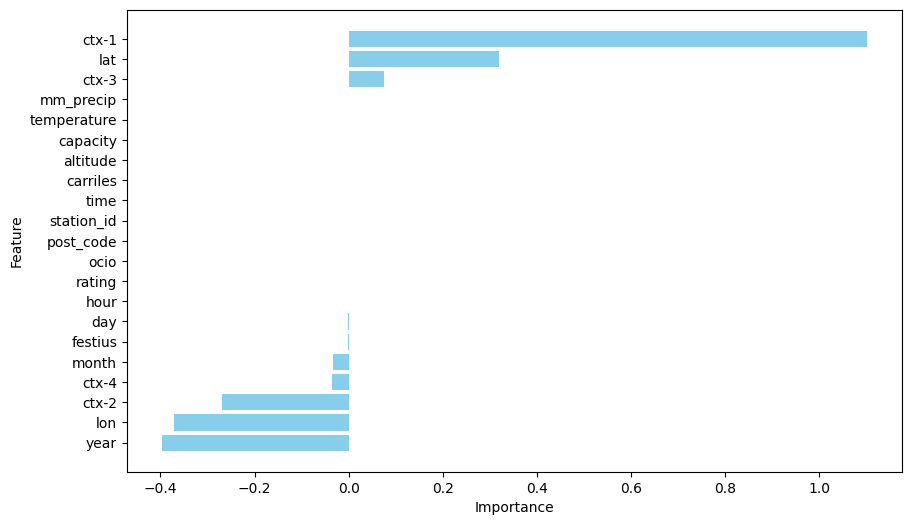

In [17]:
# Evaluem el model
plot_linear_model_feature_importance(model_linear.coef_, X.columns.to_list())

Feature: 0, Score: 0.00836
Feature: 1, Score: 0.00115
Feature: 2, Score: 0.00536
Feature: 3, Score: 0.00922
Feature: 4, Score: 0.01243
Feature: 5, Score: 0.01327
Feature: 6, Score: 0.01398
Feature: 7, Score: 0.02756
Feature: 8, Score: 0.84110
Feature: 9, Score: 0.00784
Feature: 10, Score: 0.00724
Feature: 11, Score: 0.00855
Feature: 12, Score: 0.00350
Feature: 13, Score: 0.00569
Feature: 14, Score: 0.00084
Feature: 15, Score: 0.01289
Feature: 16, Score: 0.00266
Feature: 17, Score: 0.00282
Feature: 18, Score: 0.00172
Feature: 19, Score: 0.01330
Feature: 20, Score: 0.00050


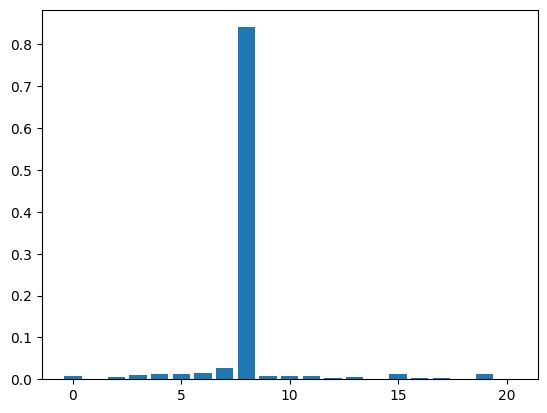

In [18]:
# Feature importance for Random Forest
importance = model_random.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=7)

model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

In [20]:
# Evaluem el model
results = evaluate_models(y_test, y_pred_random)
print(results)

{'Mean Squared Error': 0.013251081279647612, 'Mean Absolute Error': 0.07589811674522509, 'R2 Score': 0.8373335126398043}


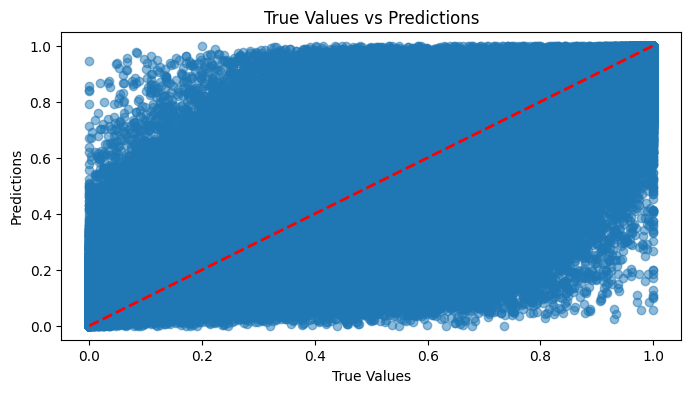

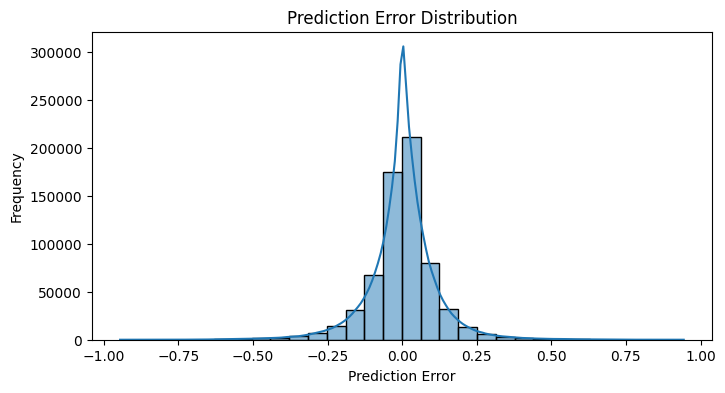

In [21]:
# Evaluem el model
plot_model_evaluation(y_test, y_pred_random)

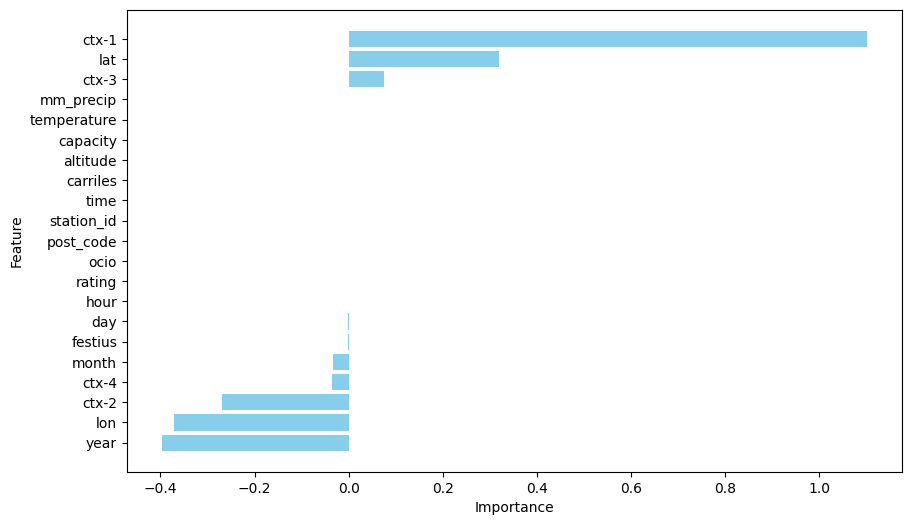

In [23]:
# Evaluem el model
plot_linear_model_feature_importance(model_linear.coef_, X.columns.to_list())

Feature: 0, Score: 0.00006
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00107
Feature: 5, Score: 0.00004
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01345
Feature: 8, Score: 0.98332
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00202
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00002
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000


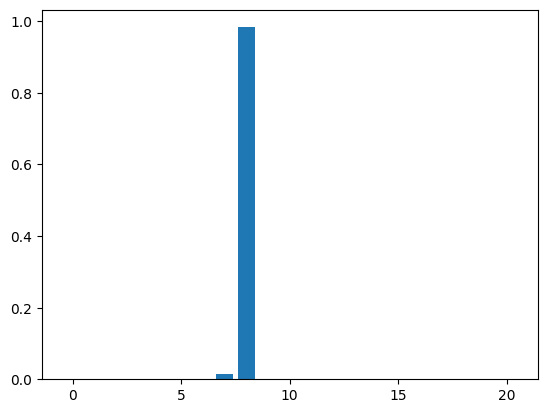

In [24]:
# Feature importance for Decision Tree

importance = model_tree.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [25]:
# CROSS VALIDATION